In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.backend_bases import MouseButton

TP01: Courbe de Bezier et polynômes de Bernstein

Definition de la fonction combinaison:

In [20]:
%matplotlib inline
def fact(i):
    
    if i ==1 or i==0:
        return 1
    else:
        return i*fact(i-1)

def comb(n,i):
    return fact(n)/(fact(n-i)*fact(i))


Fonction bezier:

In [21]:
def bezier(P,i):
    
    n=len(P)-1

    X=np.array([])
    Y=np.array([])

    t=np.linspace(0,1,i)

    for k in range(i):
        X=np.append(X,0)
        Y=np.append(Y,0)
        for l in range(n+1):
            X[k]= X[k]+( (comb(n,l))*t[k]**l*(1-t[k])**(n-l) )*P[l][0]
            Y[k]= Y[k]+( (comb(n,l))*t[k]**l*(1-t[k])**(n-l) )*P[l][1]

    return X,Y

P=[[0,0],[2,1.5],[3,2],[4,0]]
bezier(P,9)

(array([0.        , 0.70507812, 1.328125  , 1.88085938, 2.375     ,
        2.82226562, 3.234375  , 3.62304688, 4.        ]),
 array([0.        , 0.51269531, 0.9140625 , 1.18652344, 1.3125    ,
        1.27441406, 1.0546875 , 0.63574219, 0.        ]))

fonction trace_bezier: 

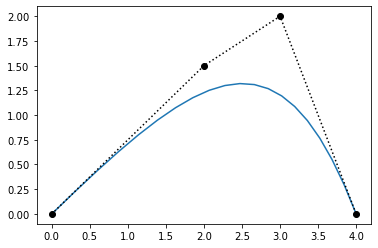

In [22]:
def trace_bezier(P,i):
    X,Y=bezier(P,i)
    plt.plot(X,Y)
    P=np.array(P)
    plt.plot(P[:,0],P[:,1],'-o',color='black',linestyle='dotted') 
    
trace_bezier(P,20)


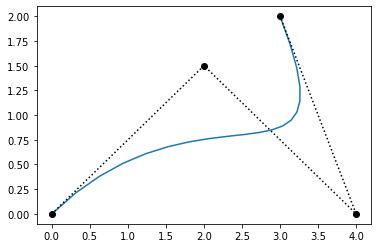

In [23]:
trace_bezier([[0,0],[2,1.5],[4,0],[3,2]],20)

Partie interactive

In [29]:
%matplotlib
V=[]

def onclick(event):
    if not event.inaxes: 
        return
    global V

    

    V.append([event.xdata, event.ydata])

    if event.button is MouseButton.RIGHT :
        if [event.xdata,event.ydata] in V:
            V.remove([event.xdata,event.ydata])
             
        


    plt.clf()
    plt.xlim([0,10])
    plt.ylim([0,10])
    trace_bezier(V,9)
    plt.draw()

    
plt.subplot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.connect('button_press_event', onclick)
plt.draw()

Using matplotlib backend: Qt5Agg
